<a href="https://colab.research.google.com/github/Shubhamverse/Bike-Sharing-Demand-Prediction__Supervised-ML-Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Alma Better(Data Science)/Supervised ML - Regression capstone project/Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [ ]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

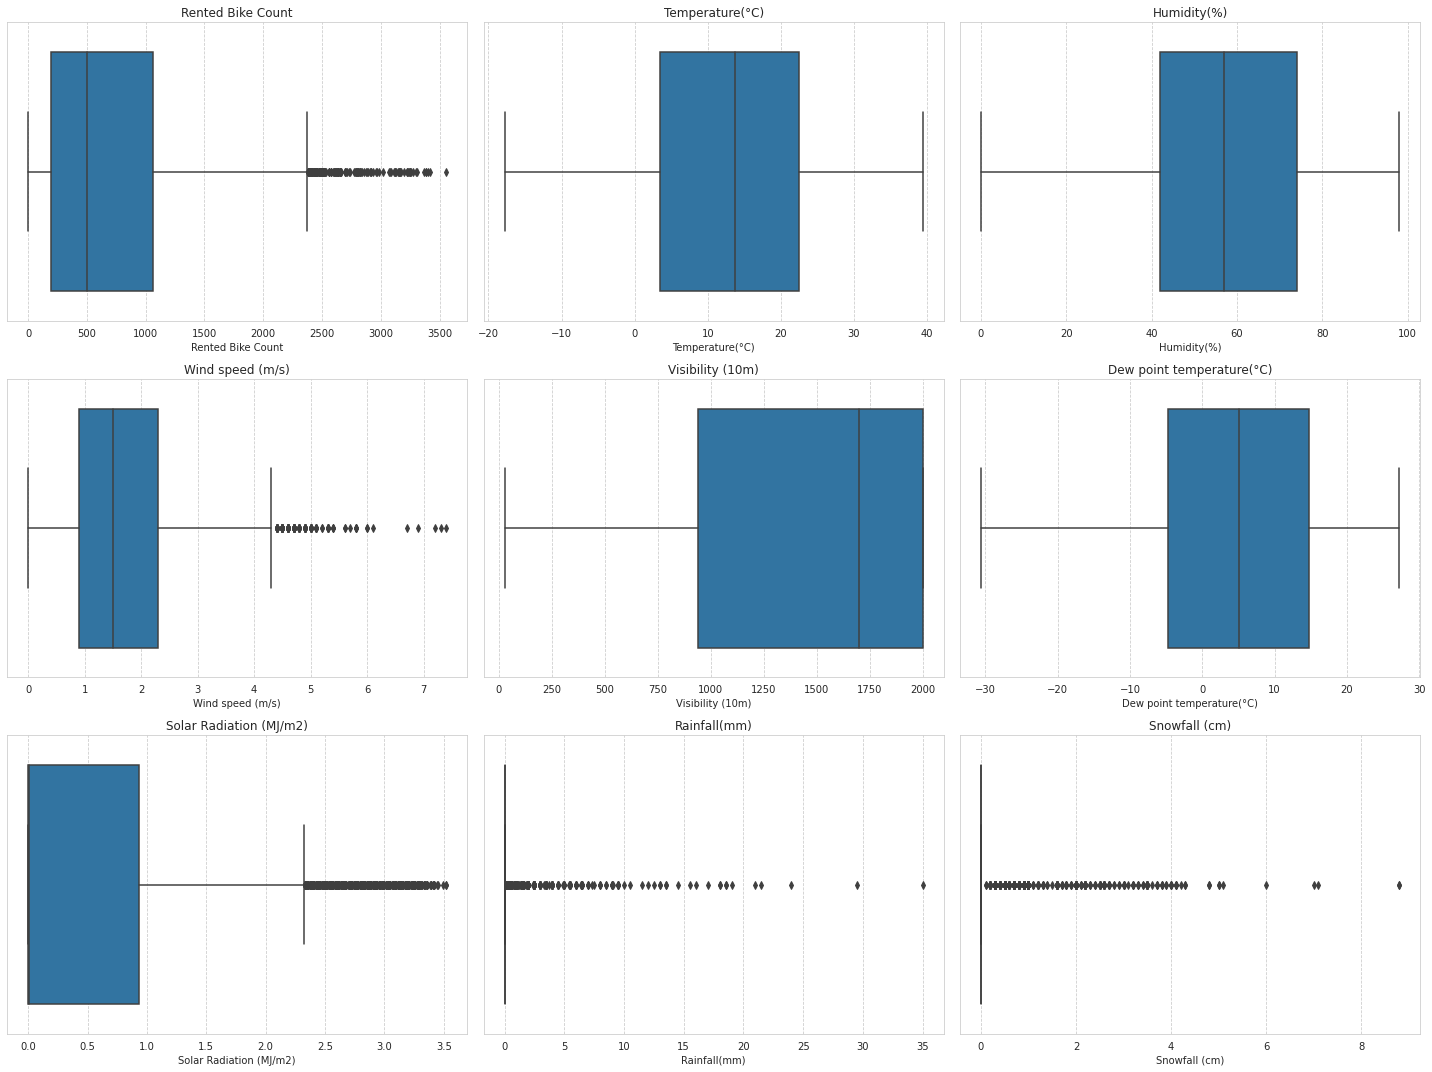

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n+=1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

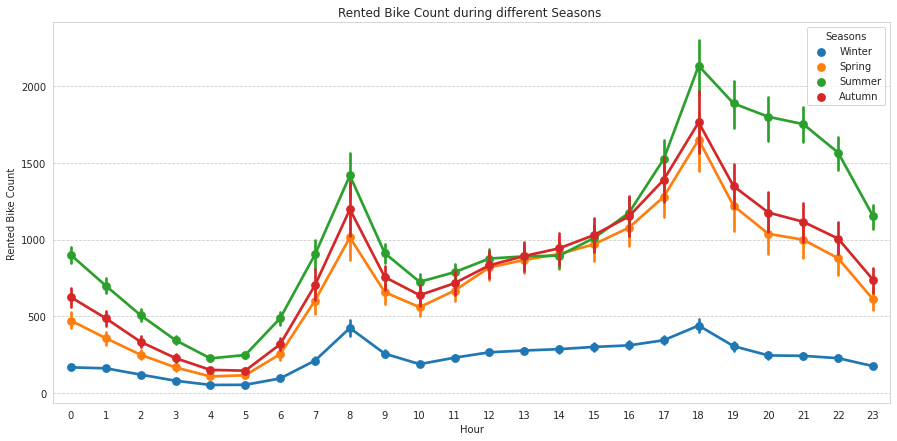

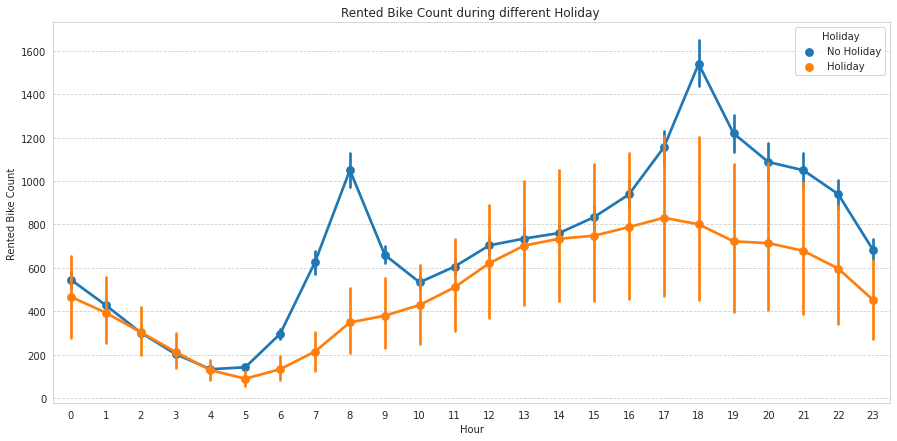

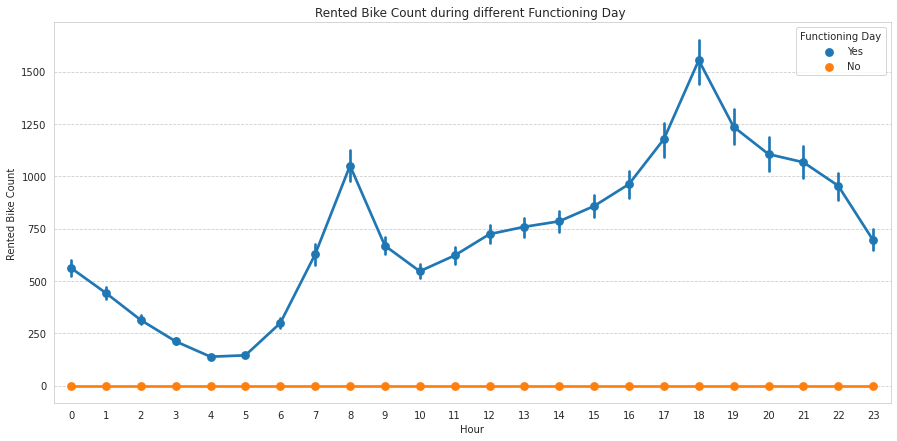

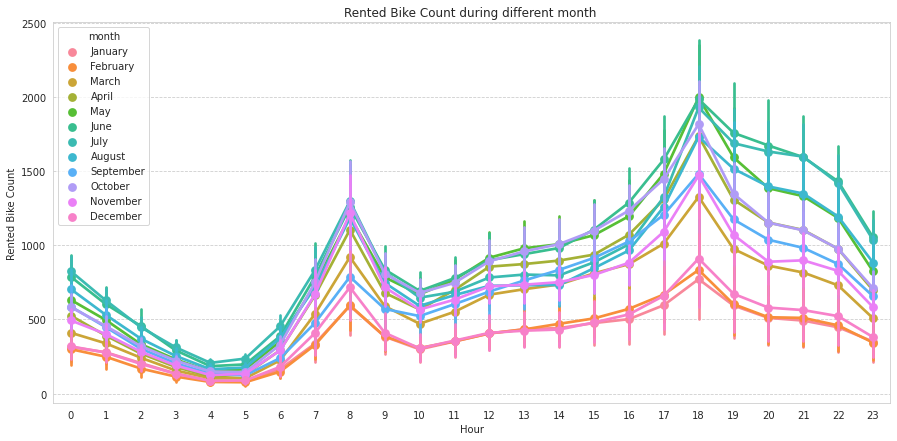

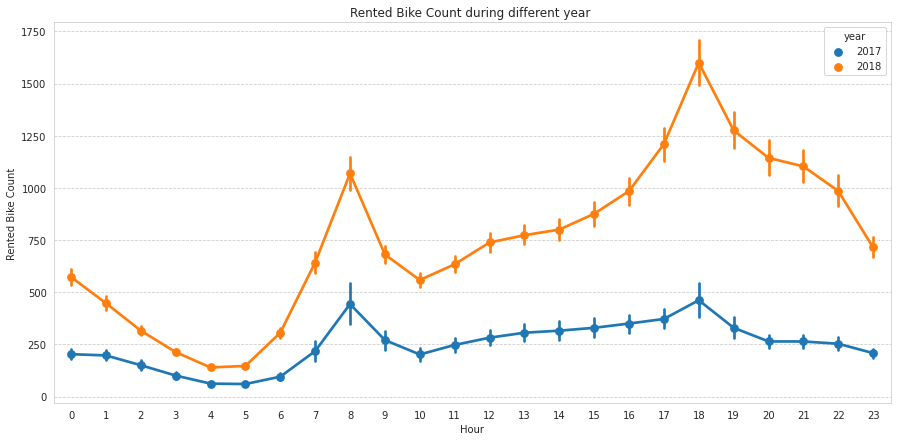

In [ ]:
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(15,7))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} ")
  plt.show()

In [ ]:
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

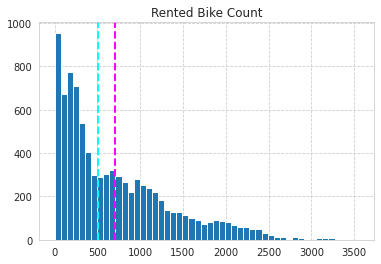

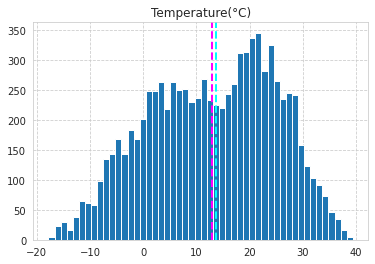

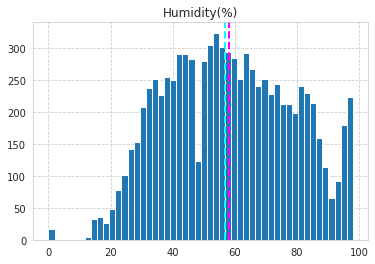

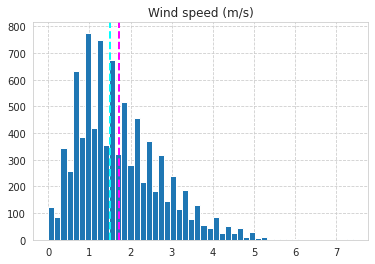

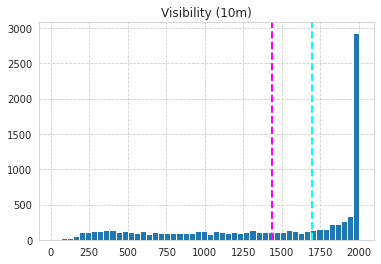

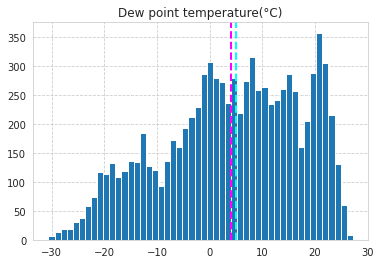

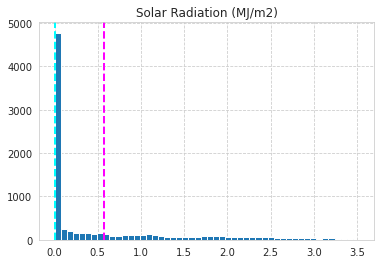

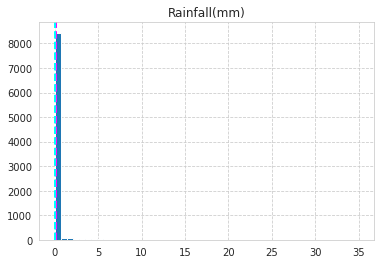

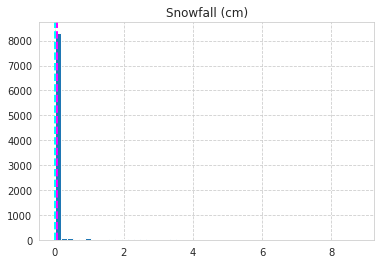

In [ ]:
#plotting histogram of all the numeric features of the dataset
for col in numeric_features[:]:
  fig=plt.figure()
  ax=fig.gca()
  feature=df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)

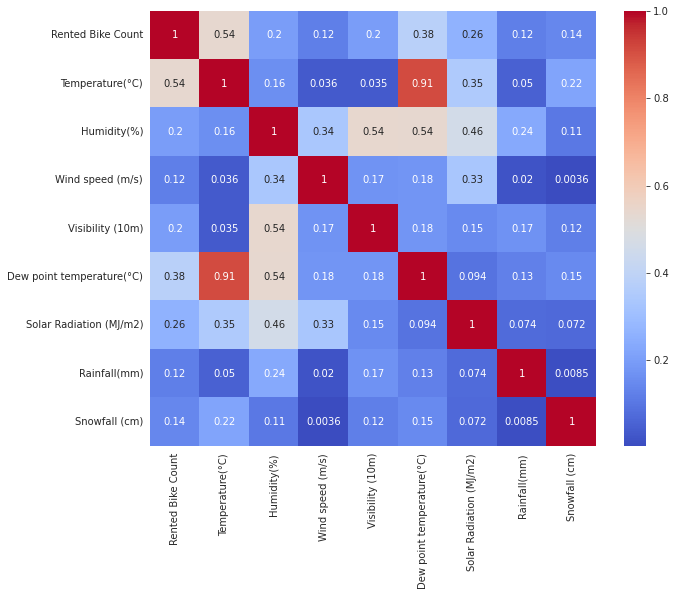

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

   
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [ ]:
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

new_df.head(5)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2018,week_Weekend
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Square root')

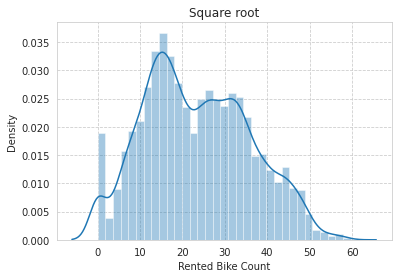

In [ ]:
sns.distplot(np.sqrt(new_df['Rented Bike Count'])).set_title("Square root")  #our dependent variable can be normalized using square root

In [ ]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### Linear Regression

In [ ]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.score(X_train,y_train)
#predicting 
reg_pred = regression.predict(X_test)

In [ ]:
regression.coef_

array([ 5.36196442, -2.77557594, -0.14386785,  0.25227069,  0.93074255,
       -1.92953174, -0.0411375 , -0.36413966, -0.9860301 , -1.45868916,
       -1.92993125, -1.84708293, -0.90935834,  0.35856304,  1.41999119,
        0.21832178, -0.66413934, -0.70887871, -0.5775653 , -0.58393781,
       -0.59378539, -0.37113566,  0.03194079,  0.85145821,  2.06133666,
        1.44790263,  1.34955469,  1.29947488,  1.05019569,  0.35382998,
       -1.32026348, -1.38038563, -3.39193432,  0.62363675,  5.25331703,
       -0.22310011,  0.05696972, -0.10634321,  0.09086137, -0.06199725,
        1.11941355,  0.04467212,  0.37261298,  0.17782644,  0.55014686,
        0.03277194, -0.61007364, -0.32188604])

In [ ]:
regression.intercept_

23.442819487037088

In [ ]:
reg_mae = mean_absolute_error(y_test**2,reg_pred**2)
print('mean absolute error is  :',reg_mae)
reg_mse = mean_squared_error(y_test**2,reg_pred**2)
print('mean squared error is  :',reg_mse)
reg_rmse = np.sqrt(reg_mse)
print('Root mean squared error is  :',reg_rmse)
reg_r2 = r2_score(y_test**2,reg_pred**2)
print("R2 score is  :",reg_r2)

mean absolute error is  : 225.2055063669683
mean squared error is  : 110282.28121403883
Root mean squared error is  : 332.08776131323907
R2 score is  : 0.7304936064589161


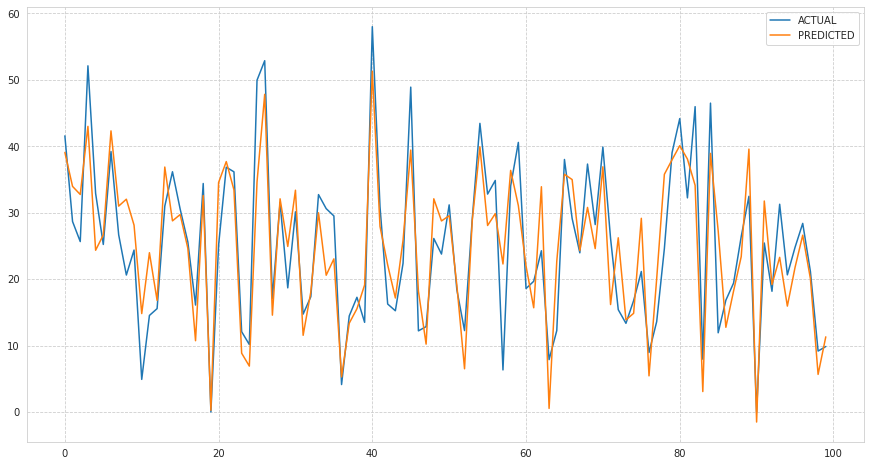

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(reg_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

## Regularization

### Lasso Regression

In [ ]:
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,y_train)
L1.score(X_train,y_train)

0.7643234007193174

In [ ]:
L1_pred = L1.predict(X_test)

In [ ]:
L1.coef_

array([ 5.35848803, -2.77603232, -0.14213258,  0.25156611,  0.92151417,
       -1.92930355, -0.03999674, -0.36243049, -0.98424791, -1.4570978 ,
       -1.92836385, -1.84544941, -0.9077105 ,  0.3584075 ,  1.4204284 ,
        0.21964192, -0.65995637, -0.70397671, -0.57195298, -0.57834905,
       -0.58829568, -0.36611682,  0.0343924 ,  0.85282413,  2.06185833,
        1.44792867,  1.34923808,  1.29919487,  1.04995856,  0.35352661,
       -1.31800833, -1.37452443, -3.39020023,  0.62166059,  5.2512394 ,
       -0.22779789,  0.05100188, -0.11127621,  0.08341313, -0.06590951,
        1.1128193 ,  0.03844736,  0.36728486,  0.17190211,  0.54492794,
        0.02726639, -0.60720791, -0.32090973])

In [ ]:
L1.intercept_

23.442819487037088

In [ ]:
L1_mae = mean_absolute_error(y_test**2,L1_pred**2)
print('mean absolute error is  :',L1_mae)
L1_mse = mean_squared_error(y_test**2,L1_pred**2)
print('mean squared error is  :',L1_mse)
L1_rmse = np.sqrt(L1_mse)
print('Root mean squared error is  :',L1_rmse)
L1_r2 = r2_score(y_test**2,L1_pred**2)
print("R2 score is  :",L1_r2)

mean absolute error is  : 225.21310978034174
mean squared error is  : 110312.41387785801
Root mean squared error is  : 332.1331267396524
R2 score is  : 0.7304199686499744


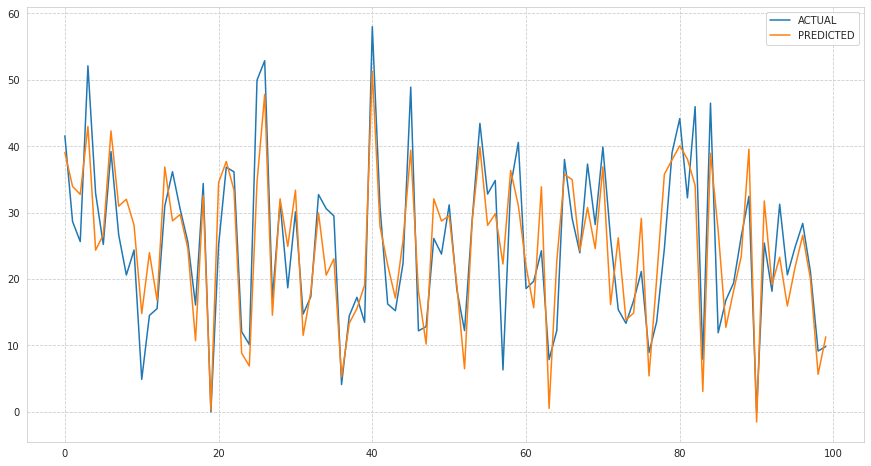

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(L1_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

### Cross Validation

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -37.579183987790124


In [ ]:
lasso_pred = lasso_regressor.predict(X_test)

In [ ]:
lasso_mae = mean_absolute_error(y_test**2,lasso_pred**2)
print('mean absolute error is  :',lasso_mae)
lasso_mse = mean_squared_error(y_test**2,lasso_pred**2)
print('mean squared error is  :',lasso_mse)
lasso_rmse = np.sqrt(lasso_mse)
print('Root mean squared error is  :',lasso_rmse)
lasso_r2 = r2_score(y_test**2,lasso_pred**2)
print("R2 score is  :",lasso_r2)

mean absolute error is  : 225.3911460374589
mean squared error is  : 110638.83073478901
Root mean squared error is  : 332.62415837516824
R2 score is  : 0.7296222754128192


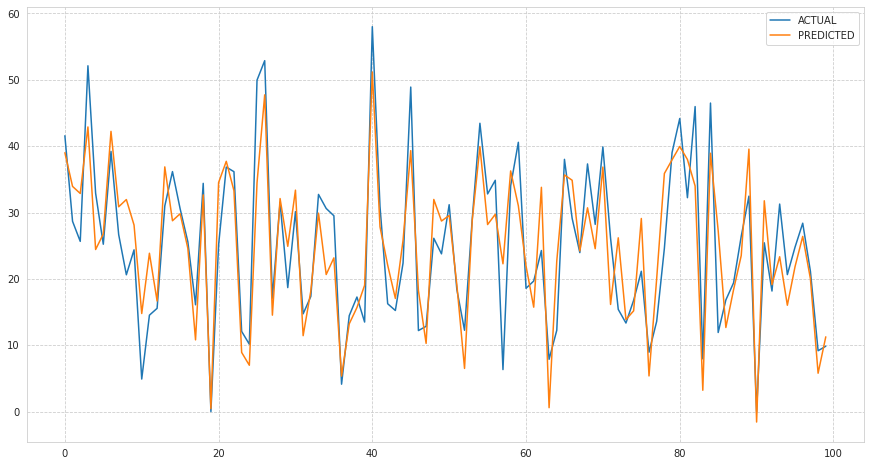

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(lasso_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

### Ridge Regression

In [ ]:
L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
L2_regressor = GridSearchCV(L2, parameters, scoring='neg_mean_squared_error', cv=5)
L2_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,L2_regressor.best_params_)
print("\nUsing ",L2_regressor.best_params_, " the negative mean squared error is: ", L2_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -37.58255212905861


In [ ]:
L2_pred = L2_regressor.predict(X_test)

In [ ]:
L2_mae = mean_absolute_error(y_test**2,L2_pred**2)
print('mean absolute error is  :',L2_mae)
L2_mse = mean_squared_error(y_test**2,L2_pred**2)
print('mean squared error is  :',L2_mse)
L2_rmse = np.sqrt(L2_mse)
print('Root mean squared error is  :',L2_rmse)
L2_r2 = r2_score(y_test**2,L2_pred**2)
print("R2 score is  :",L2_r2)

mean absolute error is  : 225.41103071082287
mean squared error is  : 110511.60537397962
Root mean squared error is  : 332.4328584450996
R2 score is  : 0.7299331870822301


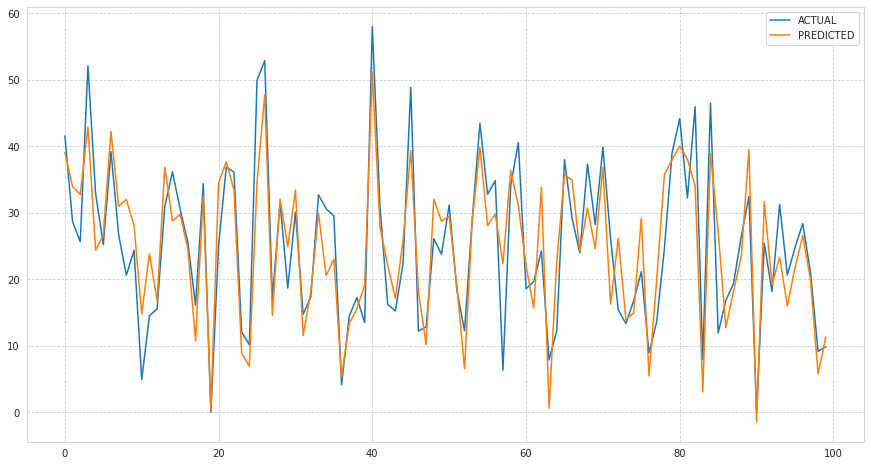

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(L2_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

In [ ]:
regression.fit(poly_X_train,y_train)

LinearRegression()

In [ ]:
regression.score(poly_X_train,y_train)


0.9177518315114659

In [ ]:
poly_pred = regression.predict(poly_X_test)

In [ ]:
poly_mae = mean_absolute_error(y_test**2,poly_pred**2)
print('mean absolute error is  :',poly_mae)
poly_mse = mean_squared_error(y_test**2,poly_pred**2)
print('mean squared error is  :',poly_mse)
poly_rmse = np.sqrt(poly_mse)
print('Root mean squared error is  :',poly_rmse)
poly_r2 = r2_score(y_test**2,poly_pred**2)
print("R2 score is  :",poly_r2)

mean absolute error is  : 169.1147336420871
mean squared error is  : 1164708.6272163405
Root mean squared error is  : 1079.2166729699559
R2 score is  : -1.8462996792571231


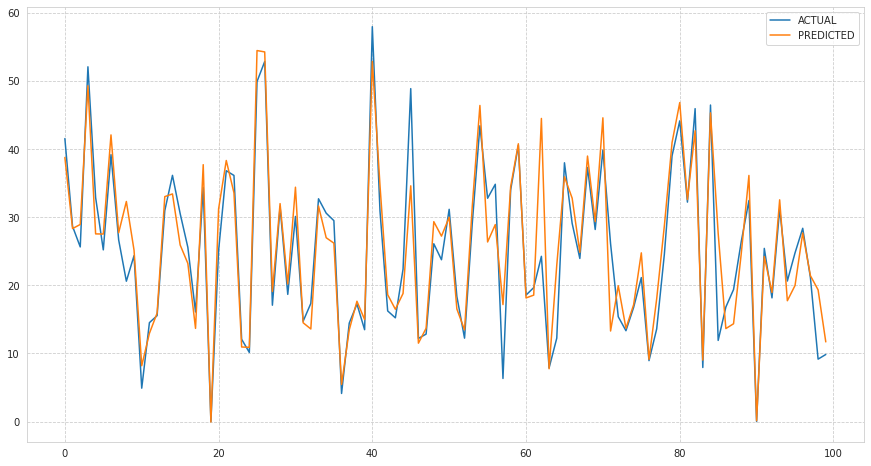

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(poly_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

In [ ]:
# Split data in X and Y
new_X = new_df.drop(columns='Rented Bike Count')
new_y = new_df['Rented Bike Count']
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(new_X,new_y, test_size=0.25,random_state=42)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### Decision Tree Regressor

In [ ]:
# imporing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Parameters for Decission Tree model
param_grid = {'criterion' : ["mse"],
              'max_depth' : [10,15,20],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
dt_reg = DecisionTreeRegressor()
# Using Grid Search 
Dt_grid_search = GridSearchCV(dt_reg,param_grid=param_grid,cv=2)

In [ ]:
dt_reg.fit(X_train,y_train)
dt_reg_pred = dt_reg.predict(X_test)



In [ ]:
#finding mean_absolute_error
dt_reg_MAE  = mean_absolute_error(y_test,dt_reg_pred)
print("MAE :" , dt_reg_MAE)
#finding mean_squared_error
dt_reg_MSE  = mean_squared_error(y_test,dt_reg_pred)
print("MSE :" , dt_reg_MSE)
#finding root mean squared error
dt_reg_RMSE = np.sqrt(dt_reg_MSE)
print("RMSE :" ,dt_reg_RMSE)
#finding the r2 score 
dt_reg_r2 = r2_score(y_test,dt_reg_pred)
print("R2 :" ,dt_reg_r2)
#finding the adjusted r2 score
dt_reg_adj_r2=1-(1-r2_score(y_test,dt_reg_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",dt_reg_adj_r2,'\n')

MAE : 169.4150684931507
MSE : 85922.20502283105
RMSE : 293.12489662741217
R2 : 0.7900244414072477
Adjusted R2 :  0.7853169090333794 



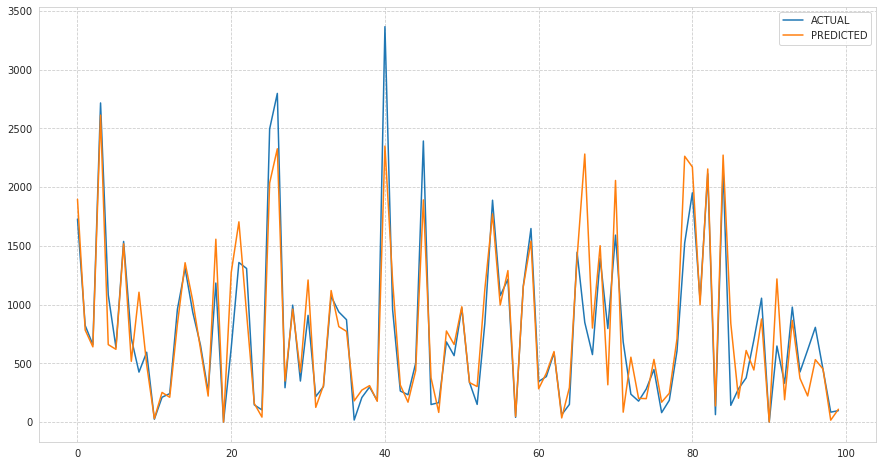

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(dt_reg_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

### Random Forest regressor

In [ ]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [ ]:
rf_reg = RandomForestRegressor()
# Using Grid SearchCV 
rf_Grid_search = GridSearchCV(rf_reg,param_grid=param_grid,n_jobs=-1,verbose=2)

In [ ]:
rf_reg.fit(X_train,y_train)
rf_reg_pred = rf_reg.predict(X_test)


In [ ]:
#finding mean_absolute_error
rf_reg_MAE  = mean_absolute_error(y_test,rf_reg_pred)
print("MAE :" , rf_reg_MAE)
#finding mean_squared_error
rf_reg_MSE  = mean_squared_error(y_test,rf_reg_pred)
print("MSE :" , rf_reg_MSE)
#finding root mean squared error
rf_reg_RMSE = np.sqrt(rf_reg_MSE)
print("RMSE :" ,rf_reg_RMSE)
#finding the r2 score 
rf_reg_r2 = r2_score(y_test,rf_reg_pred)
print("R2 :" ,rf_reg_r2)
#finding the adjusted r2 score
rf_reg_adj_r2=1-(1-r2_score(y_test,rf_reg_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",rf_reg_adj_r2,'\n')

MAE : 135.7464794520548
MSE : 50172.491614657534
RMSE : 223.99216864582016
R2 : 0.8773891225210229
Adjusted R2 :  0.8746402565149551 



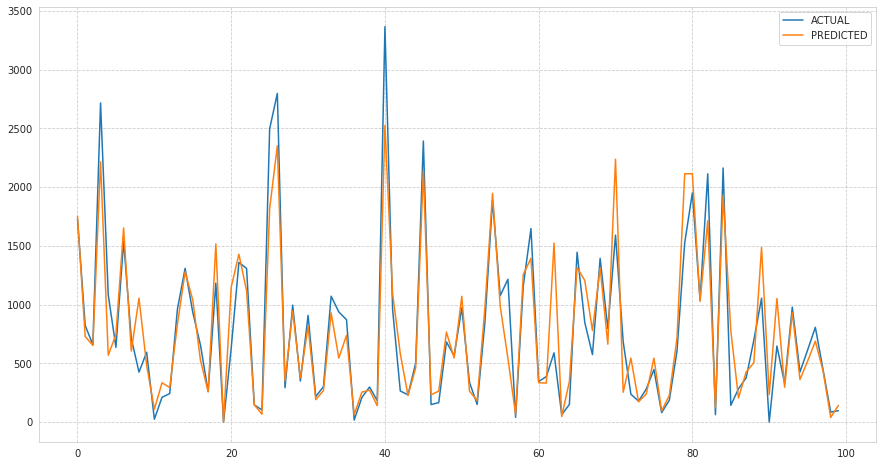

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(np.array(y_test[:100]))
plt.plot(rf_reg_pred[:100])    
plt.legend(["ACTUAL","PREDICTED"])
plt.show()

### Gradient Boosting Regressor